In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestClassifier

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
activate_profiling = False
df_train = pd.read_csv("../data/data_train.csv")
df_test = pd.read_csv("../data/data_test.csv")
target = 'income'

In [145]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [147]:
if activate_profiling:
    profile = ProfileReport(df_train, title="Pandas Profiling Report")
    profile.to_file("../reports/train.html")
    profile = ProfileReport(df_test, title="Pandas Profiling Report")
    profile.to_file("../reports/test.html")

In [149]:
X_train = df_train.drop(target, axis=1)
y_train = df_train[target]

X_test = df_test.drop(target, axis=1)
y_test = df_test[target]

In [164]:
rf_clf = RandomForestClassifier()
#params = {'criterion': 'gini', 'max_depth': 14, 'max_features': 7, 'min_samples_split': 0.0001, 'n_estimators': 32}
#params = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.001, 'min_samples_split': 0.001, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
params = {'criterion': 'gini', 'max_depth': 14, 'max_features': 4, 'min_samples_split': 0.001, 'n_estimators': 27}
rf_clf.set_params(**params)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, max_features=4, min_samples_split=0.001,
                       n_estimators=27)

In [165]:
rf_clf.score(X_train, y_train)

0.8812690027947545

Train score :  0.8812690027947545
Test score  :  0.8648117437503838
Train Classification report : 
              precision    recall  f1-score   support

           0      0.894     0.957     0.924     24720
           1      0.827     0.641     0.722      7841

    accuracy                          0.881     32561
   macro avg      0.860     0.799     0.823     32561
weighted avg      0.878     0.881     0.876     32561

Test  Classification report : 
              precision    recall  f1-score   support

           0      0.883     0.949     0.915     12435
           1      0.782     0.593     0.675      3846

    accuracy                          0.865     16281
   macro avg      0.832     0.771     0.795     16281
weighted avg      0.859     0.865     0.858     16281



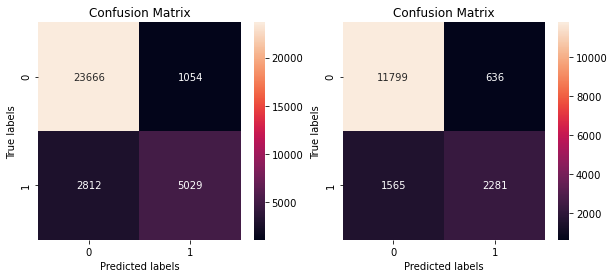

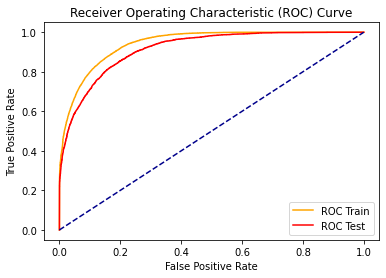

In [166]:
check_model_accuracity(rf_clf, X_train, y_train, X_test, y_test)

In [124]:
def check_model_accuracity(clf, X_train, y_train, X_test, y_test):
    print("Train score : ", clf.score(X_train, y_train))
    print("Test score  : ", clf.score(X_test, y_test))
    print("Train Classification report : ")
    print(classification_report(y_train, rf_clf.predict(X_train), digits=3))
    print("Test  Classification report : ")
    print(classification_report(y_test, rf_clf.predict(X_test), digits=3))
    
    y_pred_train = rf_clf.predict(X_train)
    cm_train = confusion_matrix(y_train, y_pred_train)
    y_pred_test = rf_clf.predict(X_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    plot_confusion_matrix(cm_train, cm_test)
    
    y_pred_proba_train = rf_clf.predict_proba(X_train)[::,1]
    fpr_train, tpr_train, _ = roc_curve(y_train,  y_pred_proba_train)
    y_pred_proba_test = rf_clf.predict_proba(X_test)[::,1]
    fpr_test, tpr_test, _ = roc_curve(y_test,  y_pred_proba_test)
    
    plot_roc_curves(fpr_train, tpr_train, fpr_test, tpr_test)
    
    

In [126]:
def plot_confusion_matrix(cm1, cm2):
    labels = ['0', '1']
    
    fig, ax =plt.subplots(1,2, figsize=(10,4))
    sns.heatmap(cm1, annot=True, ax = ax[0], fmt=".0f")

    # labels, title and ticks
    ax[0].set_xlabel('Predicted labels')
    ax[0].set_ylabel('True labels')
    ax[0].set_title('Confusion Matrix')
    ax[0].xaxis.set_ticklabels(labels)
    ax[0].yaxis.set_ticklabels(labels)
    
    sns.heatmap(cm2, annot=True, ax = ax[1], fmt=".0f")

    # labels, title and ticks
    ax[1].set_xlabel('Predicted labels')
    ax[1].set_ylabel('True labels')
    ax[1].set_title('Confusion Matrix')
    ax[1].xaxis.set_ticklabels(labels)
    ax[1].yaxis.set_ticklabels(labels)
    
    plt.show()

def plot_roc_curves(fpr_train, tpr_train, fpr_test, tpr_test):
    plt.plot(fpr_train, tpr_train, color='orange', label='ROC Train')
    plt.plot(fpr_test, tpr_test, color='red', label='ROC Test')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [84]:
print(classification_report(y_train, rf_clf.predict(X_train), digits=3))

              precision    recall  f1-score   support

           0      0.880     0.952     0.915     24720
           1      0.796     0.593     0.679      7841

    accuracy                          0.865     32561
   macro avg      0.838     0.772     0.797     32561
weighted avg      0.860     0.865     0.858     32561



In [85]:
rf_clf.score(X_test, y_test)

0.8597137767950371

In [86]:
y_pred = rf_clf.predict(X_test)

In [87]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc

In [88]:
f1_score(y_test, y_pred, zero_division=1)

0.65839066706551

In [89]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.878     0.949     0.912     12435
           1      0.775     0.572     0.658      3846

    accuracy                          0.860     16281
   macro avg      0.826     0.760     0.785     16281
weighted avg      0.853     0.860     0.852     16281



In [90]:
cm = confusion_matrix(y_test, y_pred)

[[11796   639]
 [ 1645  2201]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

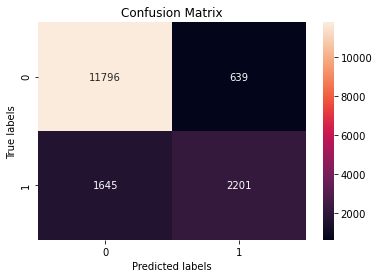

In [91]:
labels = ['0', '1']
print(cm)


ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=".0f")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


In [75]:
roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1])

0.9034461153275242

In [76]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

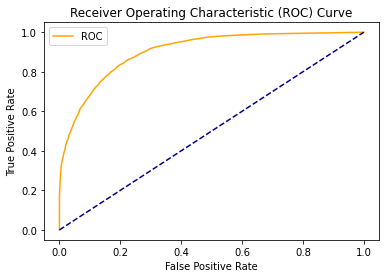

In [77]:
y_pred_proba = rf_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plot_roc_curve(fpr, tpr)

In [41]:
from sklearn import tree

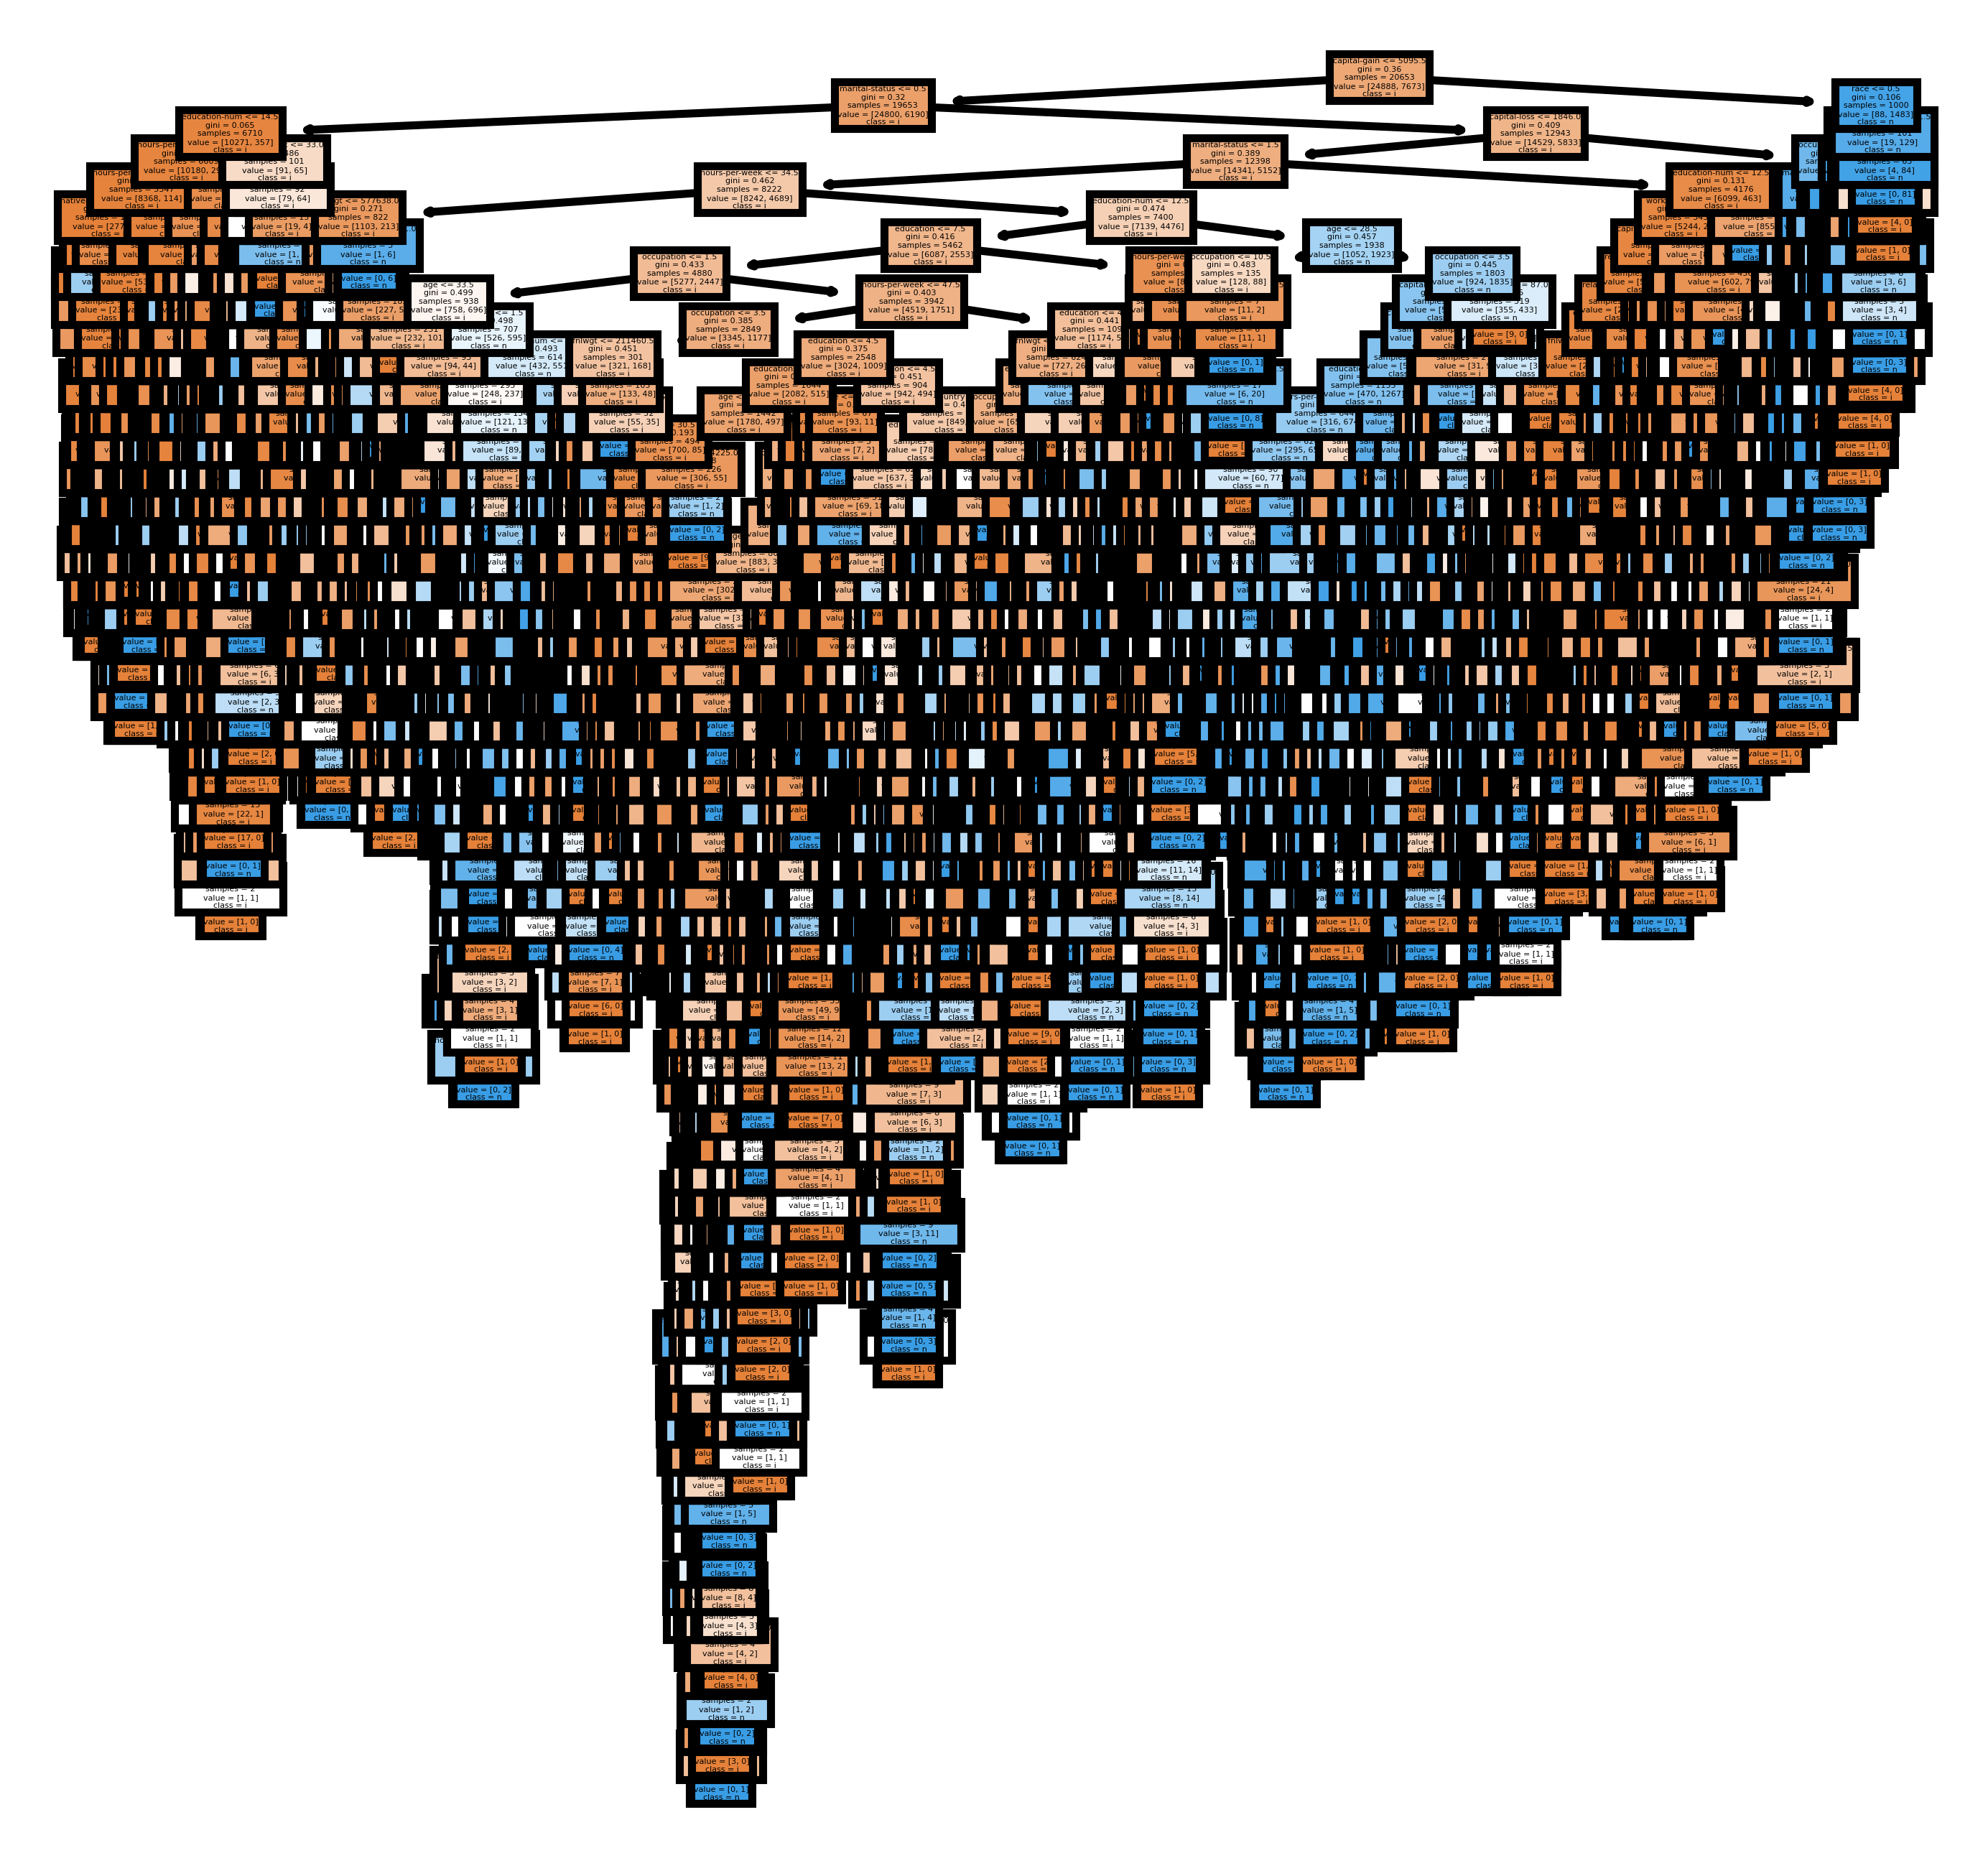

In [43]:
fn=X_train.columns
cn=target
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

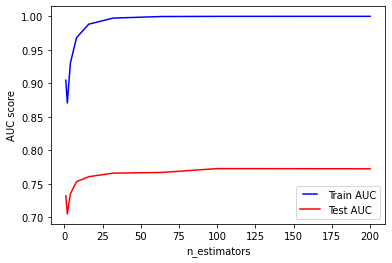

In [154]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)   
    train_pred = rf.predict(X_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = rf.predict(X_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [54]:
import numpy as np

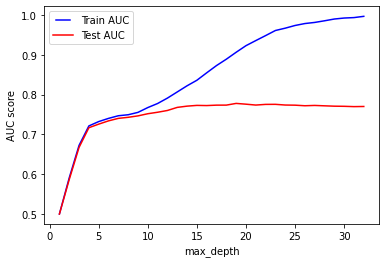

In [155]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)   
    train_pred = rf.predict(X_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = rf.predict(X_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()

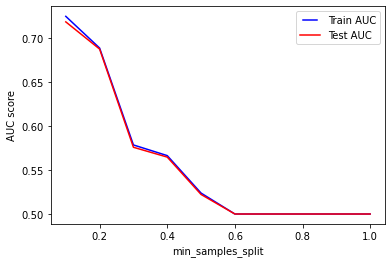

In [156]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split, n_jobs=-1)
    rf.fit(X_train, y_train)   
    train_pred = rf.predict(X_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = rf.predict(X_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.show()

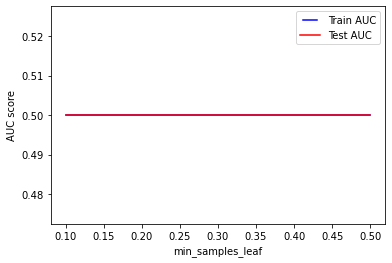

In [158]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, n_jobs=-1)
    rf.fit(X_train, y_train)   
    train_pred = rf.predict(X_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = rf.predict(X_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leaf')
plt.show()

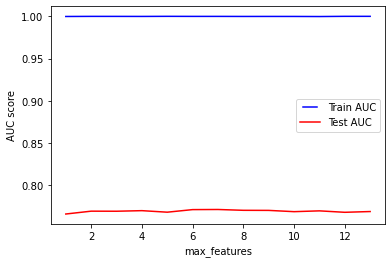

In [159]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature, n_jobs=-1)
    rf.fit(X_train, y_train)   
    train_pred = rf.predict(X_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = rf.predict(X_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

In [63]:
print(test_results)
print(train_results)

[0.7642110581890104, 0.7692544131198299, 0.7671126676188881, 0.7709163469071936, 0.7691552390684288, 0.7720434872883456, 0.7664693222228286, 0.7701832053981797, 0.7681808430358926, 0.7665657989407634, 0.7642190247320386, 0.7678685482763097, 0.7678564730043966]
[0.9999362326233898, 0.9999797734627831, 0.9999160060861729, 0.9999362326233898, 0.9999160060861729, 0.9999160060861729, 0.9998755530117394, 0.9999362326233898, 0.9998086978701697, 0.9999797734627831, 0.9997884713329528, 0.9997449304935595, 0.9999797734627831]
